# INF5007 Neural Networks / Neuroniniai tinklai
**LAB5**

## HOMEWORK TASK (OPTIONAL)

Create a Convolutional Neural Network for image classification task from one of the following datasets:
1. Classify images of clothes using the Fashion MNIST dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist
2. Teach the network to distinguish a cat from a dog: https://www.kaggle.com/competitions/dogs-vs-cats/data
3. Classify music genres using the dataset of songs spectrograms: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
4. Any other dataset, which is suitable for prediction task.

Your Notebook/script should have the following parts:
1. Data exploration (visualizing data, describing what values will be used for training, what is the target of the classification, etc.);
2. Data preparation (fill empty values, remove outliers, check the correlations);
3. Split the data into train and test sets;
4. Neural network - try at least three different structures and see which one is the best for learning;
5. Model evaluation (accuracy, loss, ROC curve, etc.) - at leas two evaluation methods.

# Image classification using Convolutional Neural Networks (CNN)

In this lab we will learn how to classify images using Keras deep learing library several different image datasets.

First we’re going to tackle a classic introductory Computer Vision problem: MNIST handwritten digit classification. The task is: given an image, classify it as a digit.

<img src="https://github.com/vytkuc/inf5007_2023_autumn/blob/main/lab5_CNN/img/mnist.webp?raw=1"
     width=750 height=500
     style="display: block; margin: 0 auto"/>

Each image in the MNIST dataset is a 28x28 matrix, which contains a centered, grayscale digit. Our CNN will take an image and output one of 10 possible classes (one for each digit).

In [ ]:
# Install the dataset library
!pip install mnist

In [ ]:
import numpy as np
import mnist
from tensorflow import keras
import matplotlib.pyplot as plt

## Load the dataset

In this case there is no need to do the train / test split since we can load already split data from the MNIST library.

In [ ]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label: 4


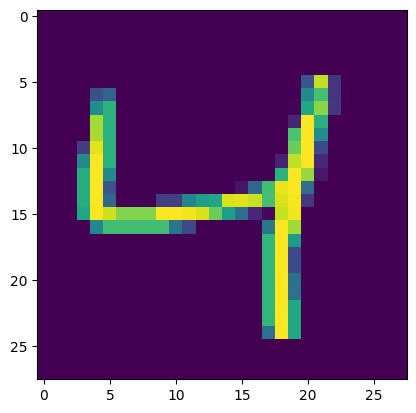

In [ ]:
index = 2

plt.imshow(train_images[index]);
print(f"Label: {train_labels[index]}")
#print(train_images[index])

## Data preparation

We will normalize the image pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train (using smaller, centered values usually leads to better results). We’ll also reshape each image from (28, 28) to (28, 28, 1) because Keras requires the third dimension.

In [ ]:
# Normalize the images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Building the model

<img src="https://github.com/vytkuc/inf5007_2023_autumn/blob/main/lab5_CNN/img/cnn.svg?raw=1"
     width=650 height=400
     style="display: block; margin: 0 auto"/>

In [ ]:
train_images[0].shape

(28, 28, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers

np.random.seed(1337)


num_filters = 8
filter_size = 3
pool_size = 2

model = keras.Sequential(
    [
        layers.Conv2D(num_filters, filter_size, input_shape=train_images[0].shape),
        layers.Conv2D(num_filters, filter_size),
        layers.MaxPooling2D(pool_size=pool_size),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation = "softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 8)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                73792     
                                                        

In [ ]:
from tensorflow.keras.utils import to_categorical
import datetime

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Tensorboard logs dir
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
  callbacks=[tensorboard_callback]
);

Epoch 1/3
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3089 - accuracy: 0.9039 - val_loss: 0.1122 - val_accuracy: 0.9682
Epoch 2/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1418 - accuracy: 0.9551 - val_loss: 0.0807 - val_accuracy: 0.9756
Epoch 3/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1092 - accuracy: 0.9661 - val_loss: 0.0690 - val_accuracy: 0.9787


In [ ]:
%load_ext tensorboard

## Saving the model

In [10]:
model.get_weights()

[array([[[[ 0.03344124,  0.23805915, -0.22054532,  0.03536459,
            0.26175767, -0.06420757,  0.07560473, -0.1705692 ]],
 
         [[-0.19989094,  0.35606363, -0.05402685, -0.37183455,
            0.14535354,  0.2158558 , -0.06177032,  0.10539572]],
 
         [[ 0.16219278, -0.15375383, -0.14960001,  0.00237748,
           -0.13015315,  0.2829765 , -0.19259043,  0.06189905]]],
 
 
        [[[-0.05913398, -0.03820112, -0.06681362,  0.28497702,
            0.2003501 ,  0.25635865,  0.2923812 ,  0.26094276]],
 
         [[ 0.29759333,  0.19944803, -0.12129179, -0.09015054,
           -0.1240852 , -0.08477805,  0.26876223, -0.10798112]],
 
         [[-0.09811763, -0.07611525,  0.18754396, -0.05827498,
           -0.13424036,  0.27876106, -0.0840658 , -0.0987557 ]]],
 
 
        [[[-0.02611505, -0.4290559 ,  0.08994357,  0.33396372,
           -0.00866992, -0.08760993,  0.15038128,  0.1093071 ]],
 
         [[ 0.29129988, -0.3615601 ,  0.17020136, -0.22142279,
           -0.0827592

In [ ]:
#model.save_weights('cnn.h5')